# -----------------------------------------------------------------------------
# Initializations

In [2]:
# Initializing and Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the Dataframe and printing it to see if it's loaded well. data is not encoded in utf-8 so encoding in lat-1 was required
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# -----------------------------------------------------------------------------
# Overview of Dataset

### Dataframe Information (Columns and Data Types)

In [6]:
# Uses the len function to get the rows and columns by changing the axis
rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  953
Number of Columns:  24


In [7]:
# This reveals the data types
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Number of NaN/Empty cells

In [9]:
# Using .isnull and .sum in conjunction with each other to see which ones have null values and the amounts
count_nan = df.isnull().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


### Changing NaN/Null values to 0(in_shazam_charts) and unknown(key)

In [11]:
# Change values of null cells to 0 for the shazam charts and unknown in the key
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)
df['key'] = df['key'].fillna('unknown')

# ',' are needed to be replaced with nothing to convert tables that are supposedly numeric
df = df.replace(',','', regex=True)

# This was a very specific case upon inspection of the .csv
df = df.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3','0', regex=True)

# Change what columns are supposedly numeric values for manipulation and computation
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'])
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])
df['streams'] = pd.to_numeric(df['streams'])

# -----------------------------------------------------------------------------
# Basic Descriptive Statistics

### Central Tendency Statistics

In [14]:
# Using .mean, .median, and .mode to see the central tendency values
mean = df['streams'].mean(axis=0)
median = df['streams'].median(axis=0)
mode = df['streams'].mode()[0]

print("The mean of the streams column is", mean)
print("The median of the streams column is", median)
print("The mode of the streams column is", mode)

The mean of the streams column is 513597931.3137461
The median of the streams column is 290228626.0
The mode of the streams column is 156338624


### Distribution Trends/Outliers

In [16]:
# Using .groupby and .size to check how many songs are released in which year
yrtrend = pd.DataFrame(df.groupby('released_year').size()).reset_index()
artstct = pd.DataFrame(df.groupby('artist_count').size()).reset_index()

# Use .columns to change the labels of the columns
yrtrend.columns = ['released_year', 'count']
artstct.columns = ['artist_count', 'count']

In [17]:
yrtrend

,released_year,count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1


,released_year,count
count,50.000000,50.00000
mean,1990.440000,19.06000
std,24.133269,62.71751
min,1930.000000,1.00000
25%,1973.500000,1.00000
50%,1995.500000,2.00000
75%,2010.750000,9.25000
max,2023.000000,402.00000


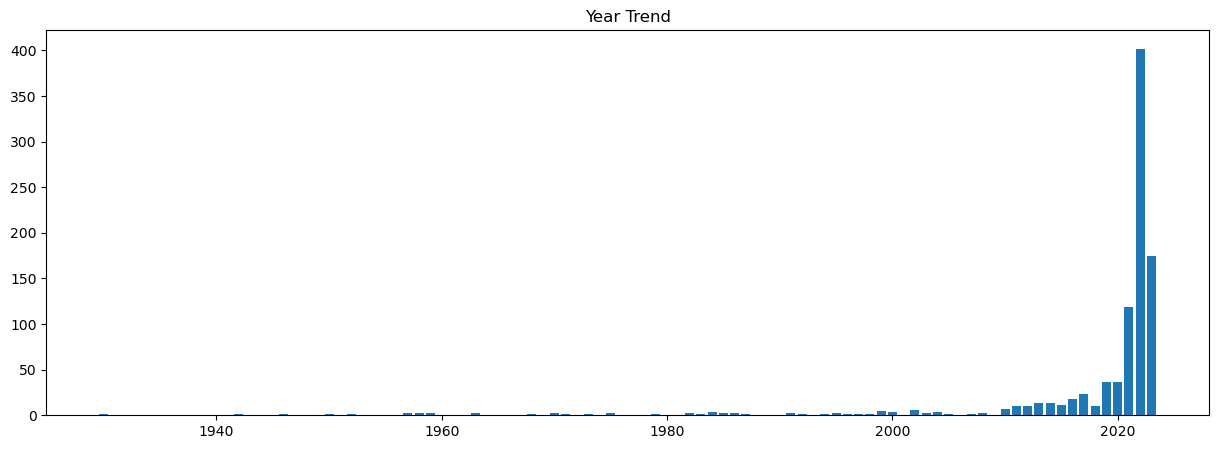

In [18]:
# Use a visual representation and .describe function to see outliers (Max and Min are usually taken as outliers). Only take note of count column
plt.figure(figsize=(15, 5))
plt.bar(yrtrend['released_year'], yrtrend['count'])
plt.title('Year Trend')
yrtrend.describe()

In [19]:
artstct

,artist_count,count
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2


,artist_count,count
count,8.00000,8.000000
mean,4.50000,119.125000
std,2.44949,208.069657
min,1.00000,2.000000
25%,2.75000,2.750000
50%,4.50000,10.000000
75%,6.25000,127.250000
max,8.00000,587.000000


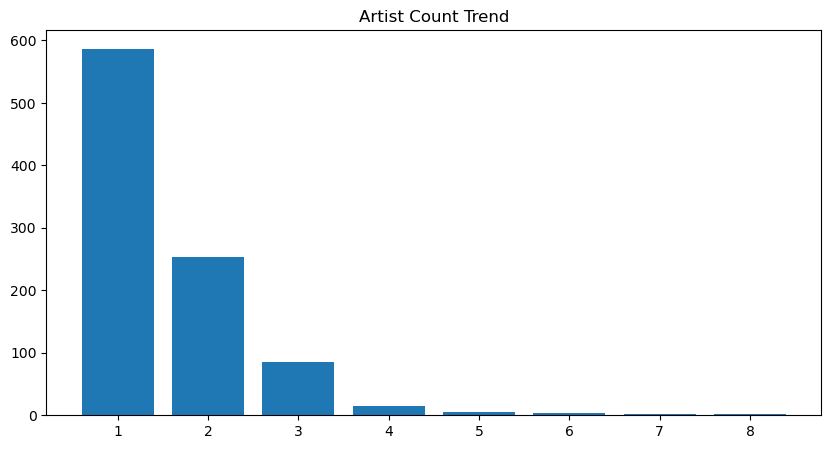

In [20]:
# Use a visual representation and .describe function to see outliers (Max and Min are usually taken as outliers). Only take note of count column
plt.figure(figsize=(10, 5))
plt.bar(artstct['artist_count'], artstct['count'])
plt.title('Artist Count Trend')
artstct.describe()

# -----------------------------------------------------------------------------
# Top Performers

### Most Streamed Tracks

In [23]:
# Copy the columns track_name and streams into their own separate Data Frame using .copy and use .sort_values and .head functions
# to check the top 5 streamed songs
topstream = (df[['track_name', 'streams']].copy()).sort_values(by='streams',ascending=False,ignore_index=True)
topstream.head()

,track_name,streams
0,Blinding Lights,3703895074
1,Shape of You,3562543890
2,Someone You Loved,2887241814
3,Dance Monkey,2864791672
4,Sunflower - Spider-Man: Into the Spider-Verse,2808096550


### Most Frequent Artists

In [25]:
# Using .groupby and .size to merge all the similar songs and count their entries in the .csv file
artsts = pd.DataFrame(df.groupby('artist(s)_name').size()).reset_index()

# Use .columns to change the labels of the columns
artsts.columns = ['artist(s)_name', 'songs']

# Sort with who has the most songs in the .csv, descending
artsts = artsts.sort_values(by='songs',ascending=False,ignore_index=True)
artsts

,artist(s)_name,songs
0,Taylor Swift,34
1,The Weeknd,22
2,SZA,19
3,Bad Bunny,19
4,Harry Styles,17
...,...,...
640,Israel & Rodolffo Ana Castela,1
641,Israel & Rodolffo Mari Fernandez,1
642,J Balvin Bad Bunny,1
643,J Balvin Maria Becerra,1


# -----------------------------------------------------------------------------
#  Temporal Trends

### Number of Tracks per Year

Text(0.5, 1.0, 'Songs per Year')

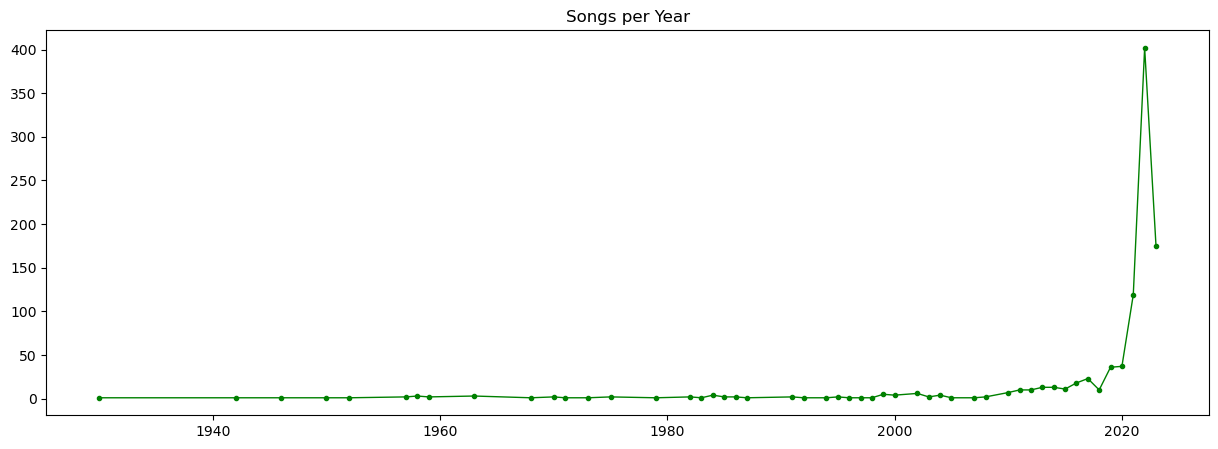

In [28]:
# Visual representation of songs per year
plt.figure(figsize=(15, 5))
plt.plot(yrtrend['released_year'], yrtrend['count'],'g.-', linewidth=1)
plt.title('Songs per Year')

### Tracks per Month

In [30]:
# use groupby and size function to count how much songs are released each months
monthtrend = (pd.DataFrame(df.groupby('released_month').size()).reset_index())

# use .columns function to change column names
monthtrend.columns = ['released_month', 'count']
monthtrend

,released_month,count
0,1,134
1,2,61
2,3,86
3,4,66
4,5,128
5,6,86
6,7,62
7,8,46
8,9,56
9,10,73


Text(0.5, 1.0, 'Songs per Month')

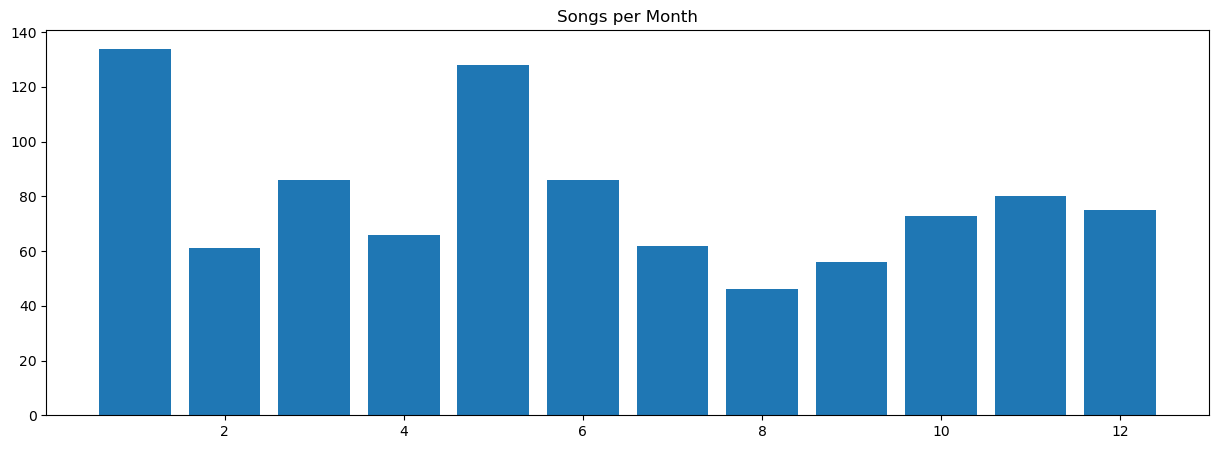

In [124]:
# Visual representation of songs each month
plt.figure(figsize=(15, 5))
plt.bar(monthtrend['released_month'], monthtrend['count'])
plt.title('Songs per Month')

# -----------------------------------------------------------------------------
# Genre and Music Characteristics

### Streams and Attributes Correlation

In [34]:
# grab all the required attributes into their own dataframe using .copy
attribute = df[['streams','bpm','danceability_%','energy_%']].copy()
attribute

,streams,bpm,danceability_%,energy_%
0,141381703,125,80,83
1,133716286,92,71,74
2,140003974,138,51,53
3,800840817,170,55,72
4,303236322,144,65,80
...,...,...,...,...
948,91473363,144,60,39
949,121871870,166,42,24
950,73513683,92,80,67
951,133895612,97,82,77


In [35]:
# Use .corr to check for correlation. 
#In default, it uses the Pearson method, and the closer the value to either 1 or -1, the higher the correlation
attribute.corr()['streams']

streams           1.000000
bpm              -0.002011
danceability_%   -0.104451
energy_%         -0.026311
Name: streams, dtype: float64

Text(0.5, 1.0, 'Visual representation of BPM and Streams Correlation')

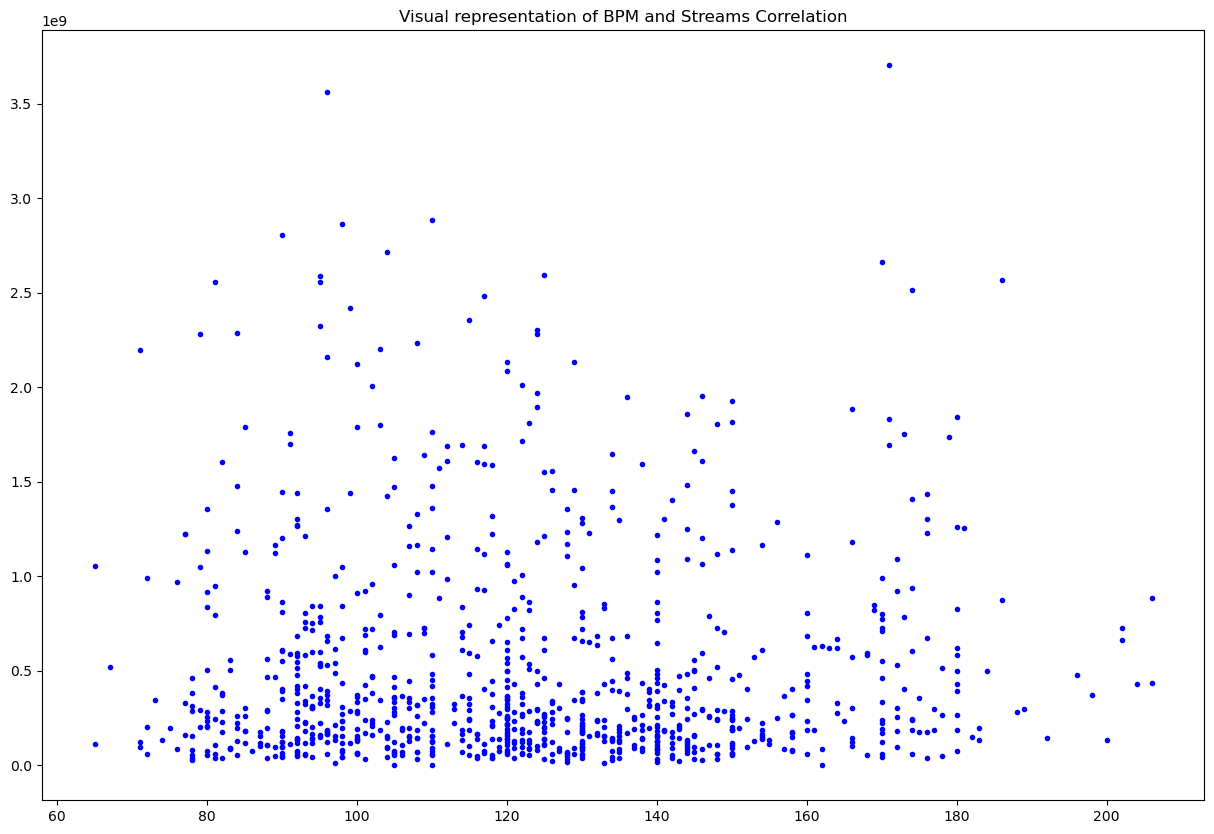

In [36]:
# Visual representation of correlation by scatter plot for BPM and Streams Correlation
plt.figure(figsize=(15, 10))
plt.plot(attribute['bpm'], attribute['streams'],'b.', linewidth=1)
plt.title('Visual representation of BPM and Streams Correlation')

Text(0.5, 1.0, 'Visual representation of Danceabilty% and Streams Correlation')

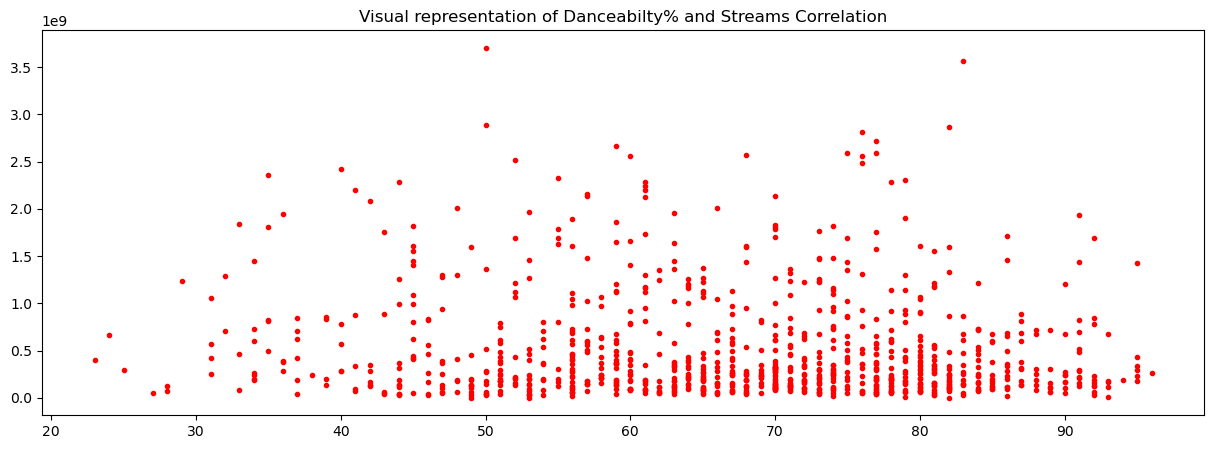

In [37]:
# Visual representation of correlation by scatter plot for Danceability and Streams Correlation
plt.figure(figsize=(15, 5))
plt.plot(attribute['danceability_%'], attribute['streams'],'r.')
plt.title('Visual representation of Danceabilty% and Streams Correlation')

Text(0.5, 1.0, 'Visual representation of Energy% and Streams Correlation')

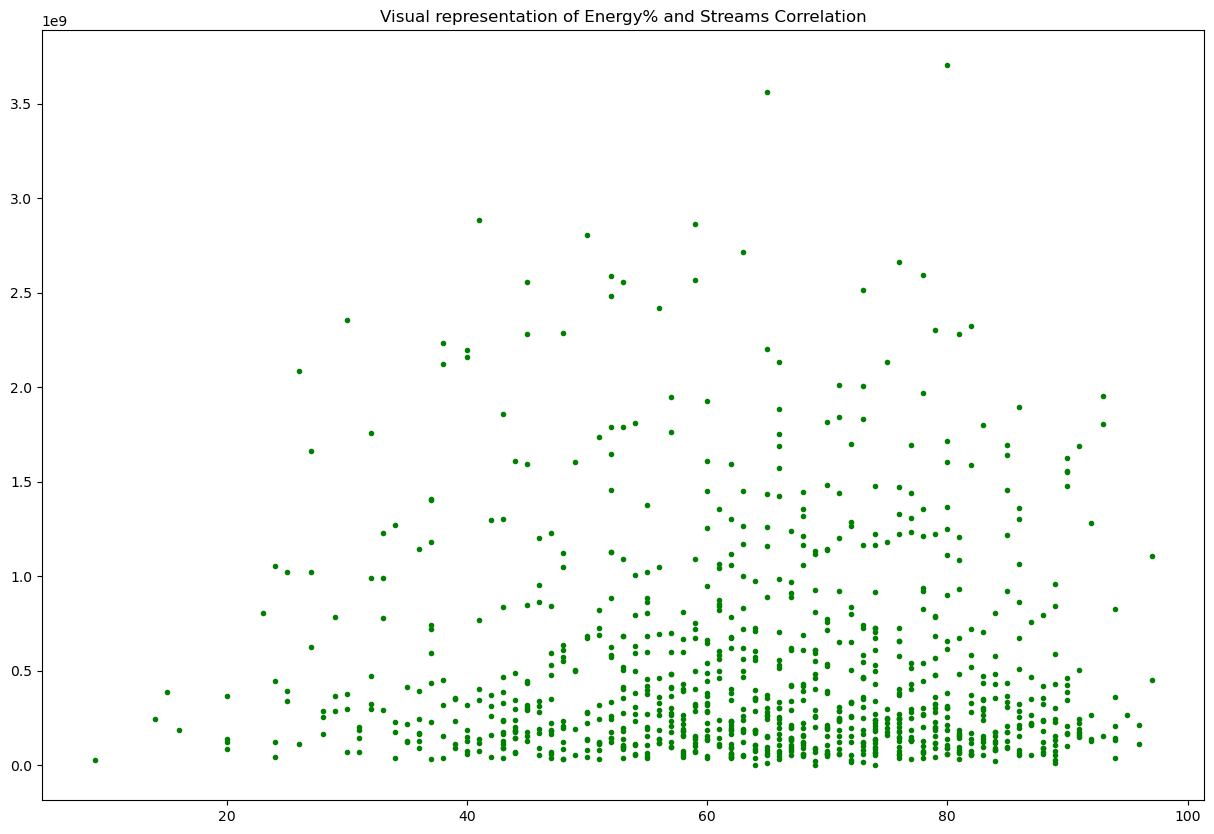

In [38]:
# Visual representation of correlation by scatter plot for Energy and Streams Correlation
plt.figure(figsize=(15, 10))
plt.plot(attribute['energy_%'], attribute['streams'],'g.')
plt.title('Visual representation of Energy% and Streams Correlation')

### Attribute to Attribute Correlations

In [40]:
# Copy and use .corr to check the correlation of danceability and energy (Look at energy as the .corr function checks the correlation of the danceability column with all the columns)
attr1 = df[['danceability_%','energy_%']].copy()
attr1.corr()['danceability_%']

danceability_%    1.000000
energy_%          0.198095
Name: danceability_%, dtype: float64

Text(0.5, 1.0, 'Visual representation of Danceabilty% and Energy% Correlation')

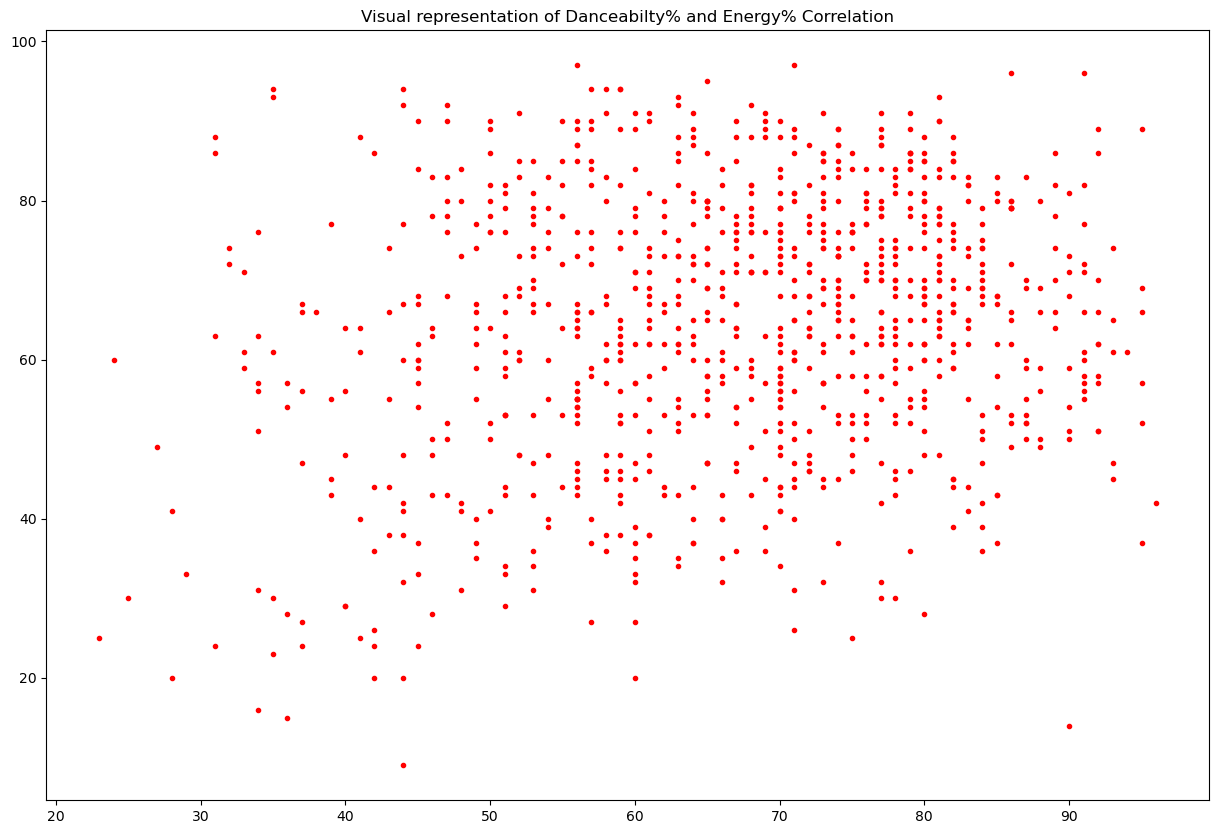

In [41]:
# Visual representation of said correlation
plt.figure(figsize=(15, 10))
plt.plot(attr1['danceability_%'], attr1['energy_%'],'r.')
plt.title('Visual representation of Danceabilty% and Energy% Correlation')

In [42]:
# Copy and use .corr to check the correlation of valence and acousticness (Look at acousticness as the .corr function checks the correlation of the danceability column with all the columns)
attr2 = df[['valence_%','acousticness_%']].copy()
attr2.corr()['valence_%']

valence_%         1.000000
acousticness_%   -0.081907
Name: valence_%, dtype: float64

Text(0.5, 1.0, 'Visual representation of Energy% and Streams Correlation')

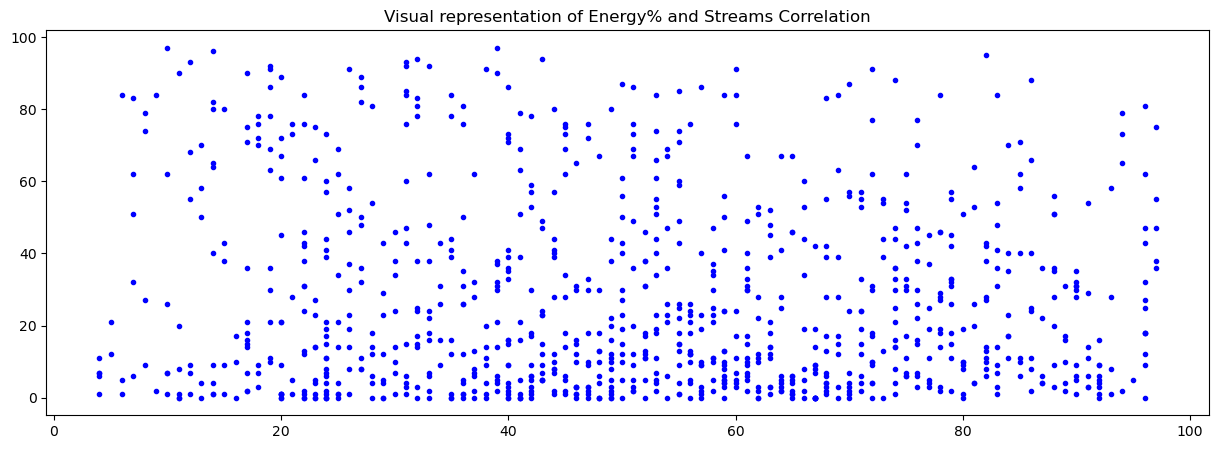

In [43]:
# Visual representation of said correlation
plt.figure(figsize=(15, 5))
plt.plot(attr2['valence_%'], attr2['acousticness_%'],'b.')
plt.title('Visual representation of Energy% and Streams Correlation')

# -----------------------------------------------------------------------------
# Platform Popularity

In [45]:

plat = df[['track_name','streams','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts']].copy()
plat = plat.sort_values(by='streams',ascending=False,ignore_index=True)


In [46]:
# Check the max values to see what the highest values in each platform, and can easily identify which platforms are more used than the other
plat.describe()

,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
count,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5.135979e+08,5200.124869,12.009444,67.812172,51.908709,385.187828,2.666317,56.847849
std,5.668039e+08,7897.608990,19.575992,86.441493,50.630241,1130.535561,6.035599,157.441749
min,0.000000e+00,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.413817e+08,875.000000,0.000000,13.000000,7.000000,13.000000,0.000000,0.000000
50%,2.902286e+08,2224.000000,3.000000,34.000000,38.000000,44.000000,0.000000,2.000000
75%,6.738011e+08,5542.000000,16.000000,88.000000,87.000000,164.000000,2.000000,33.000000
max,3.703895e+09,52898.000000,147.000000,672.000000,275.000000,12367.000000,58.000000,1451.000000


### Spotify

Text(0.5, 1.0, 'Spotify Charts and Streams')

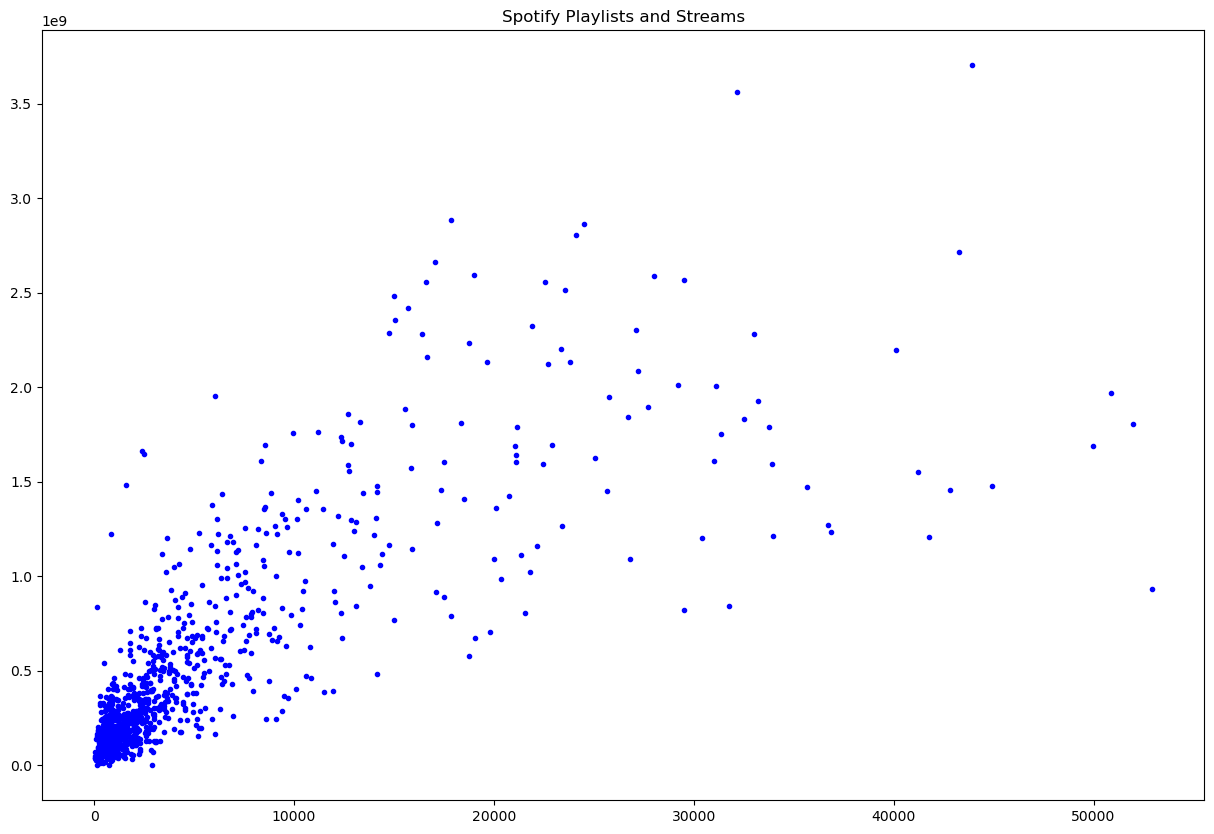

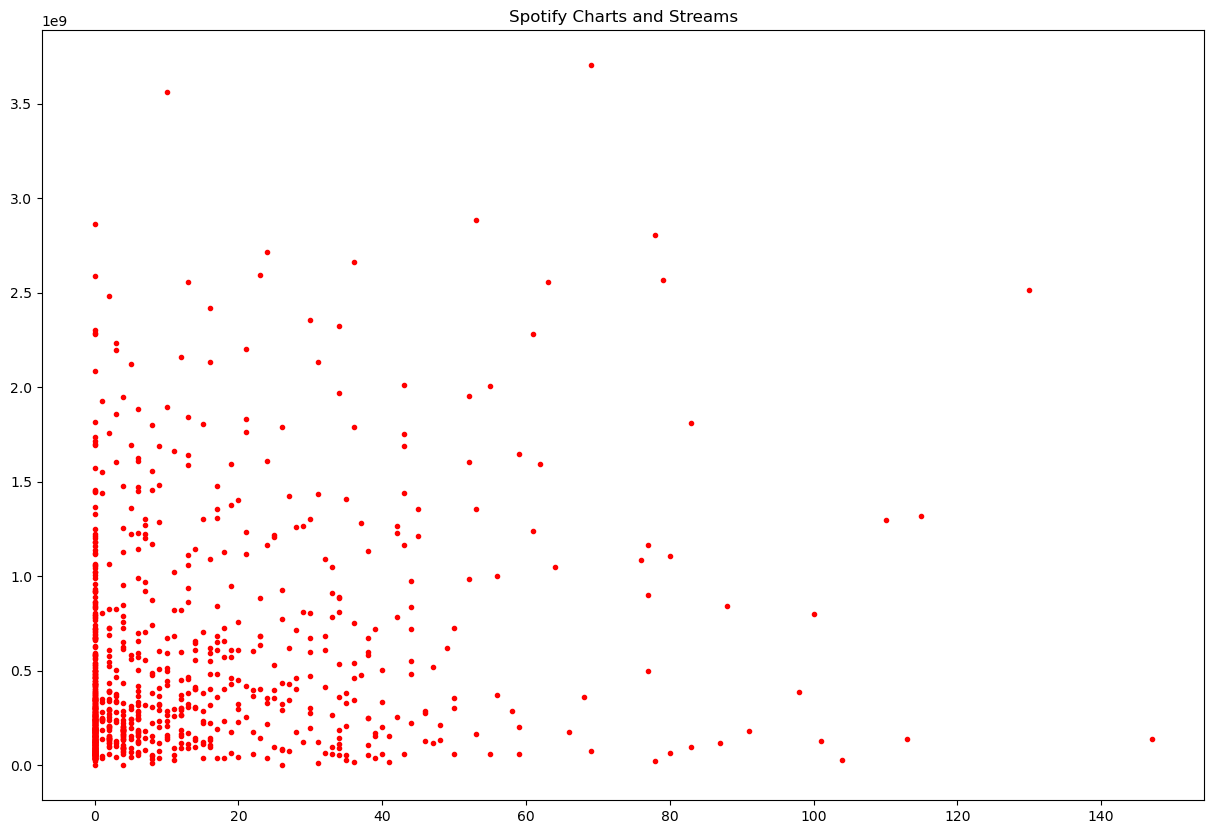

In [48]:
# Visual representation of which platforms show the same insight as the total streams
plt.figure(figsize=(15, 10))
plt.plot(plat['in_spotify_playlists'], plat['streams'],'b.')
plt.title('Spotify Playlists and Streams')

plt.figure(figsize=(15, 10))
plt.plot(plat['in_spotify_charts'], plat['streams'],'r.')
plt.title('Spotify Charts and Streams')

### Apple

Text(0.5, 1.0, 'Apple Charts and Streams')

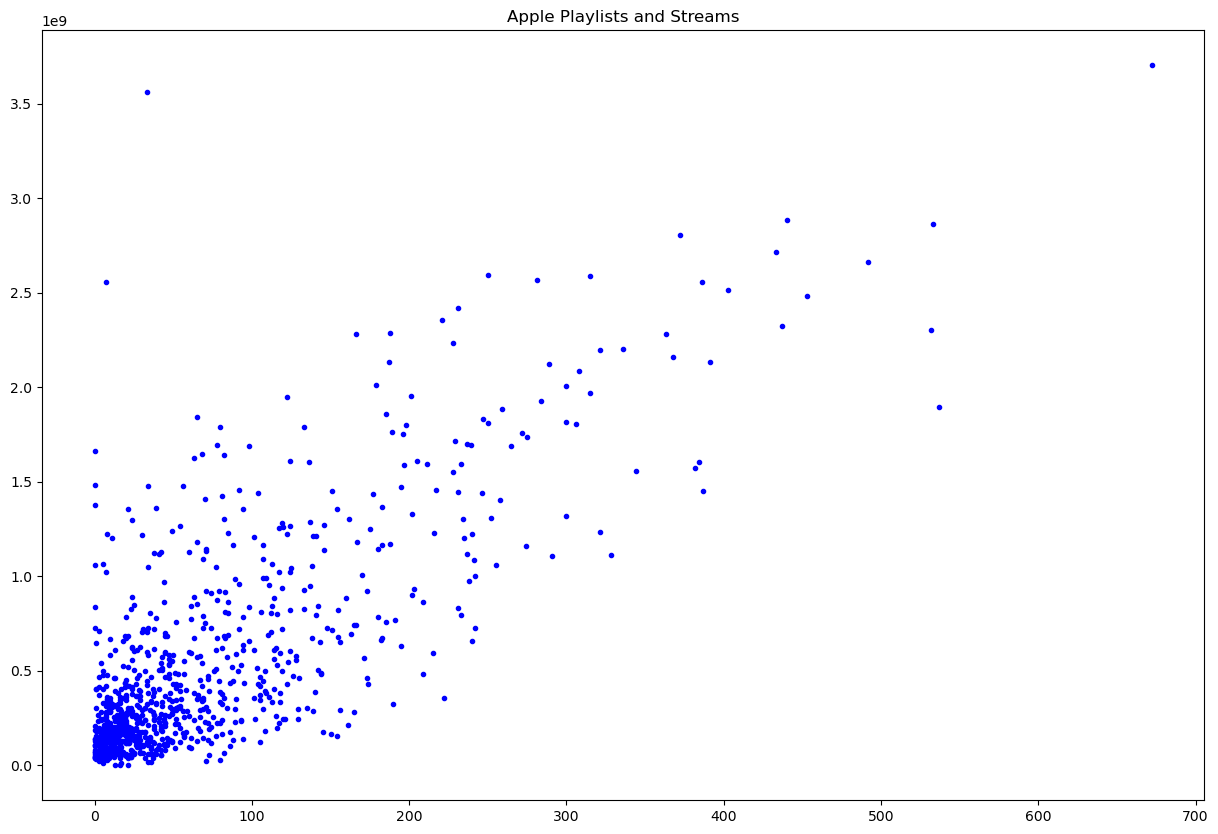

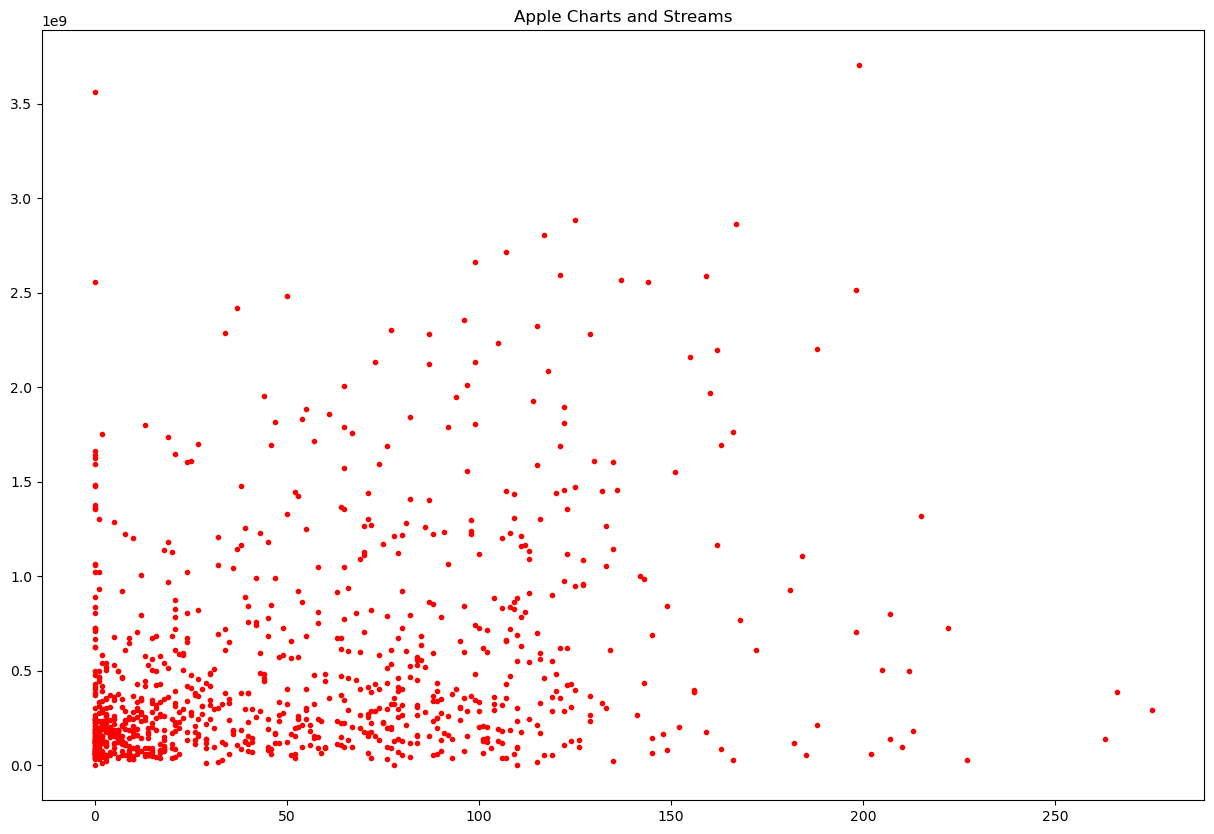

In [50]:
# Visual representation of which platforms show the same insight as the total streams
plt.figure(figsize=(15, 10))
plt.plot(plat['in_apple_playlists'], plat['streams'],'b.')
plt.title('Apple Playlists and Streams')

plt.figure(figsize=(15, 10))
plt.plot(plat['in_apple_charts'], plat['streams'],'r.')
plt.title('Apple Charts and Streams')

### Deezer

Text(0.5, 1.0, 'Deezer Charts and Streams')

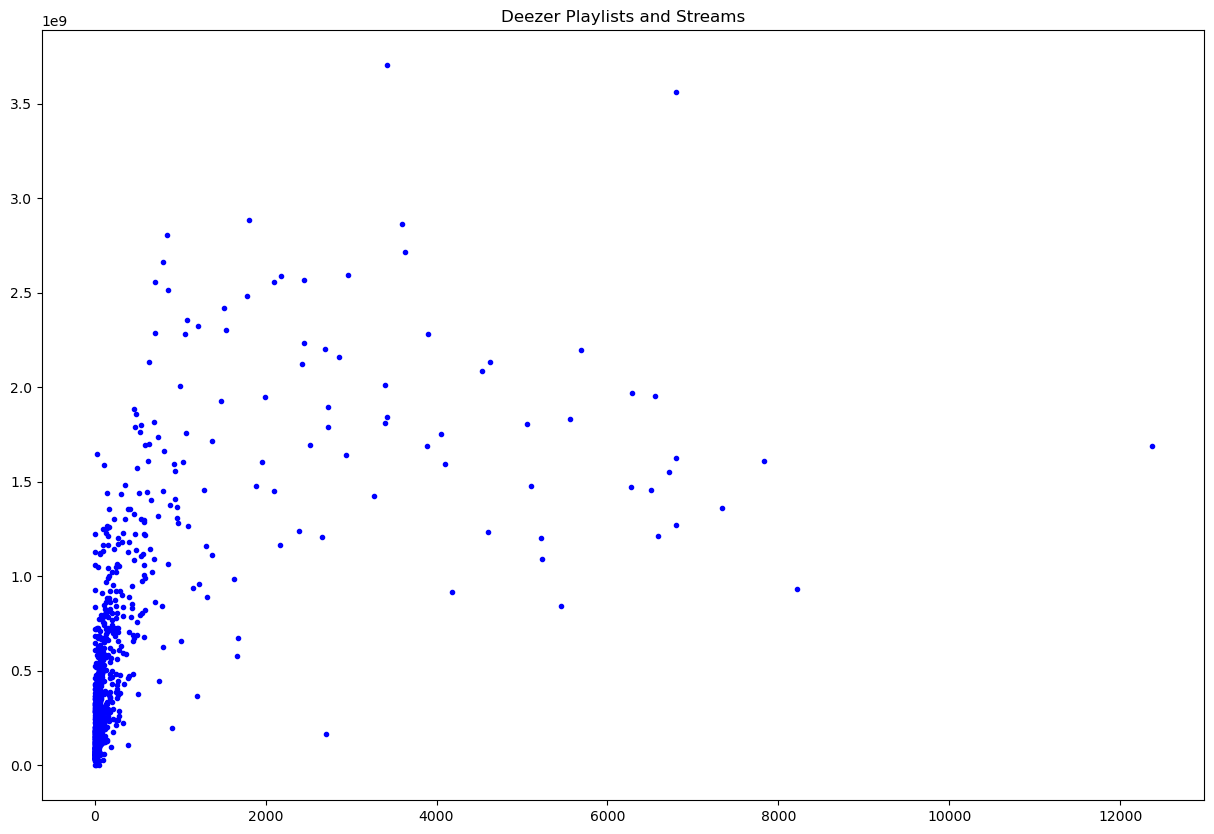

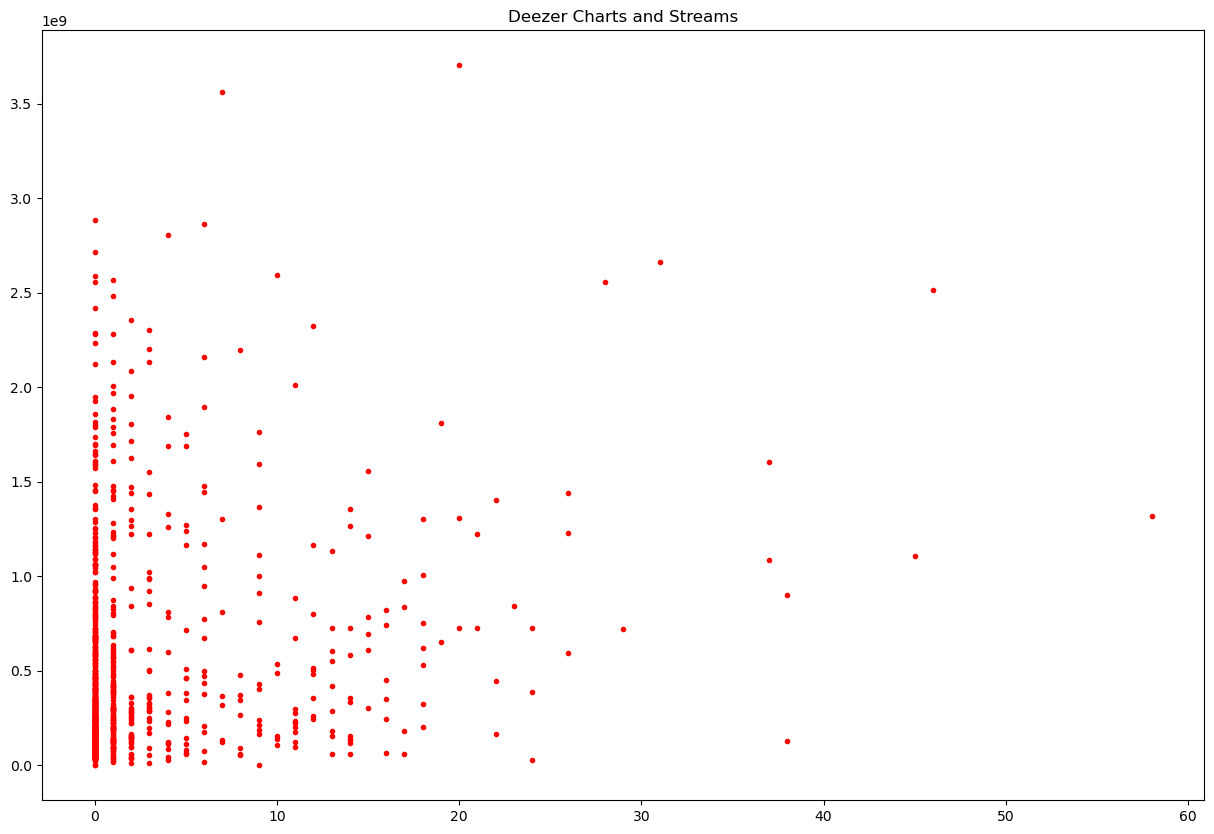

In [52]:
# Visual representation of which platforms show the same insight as the total streams
plt.figure(figsize=(15, 10))
plt.plot(plat['in_deezer_playlists'], plat['streams'],'b.')
plt.title('Deezer Playlists and Streams')

plt.figure(figsize=(15, 10))
plt.plot(plat['in_deezer_charts'], plat['streams'],'r.')
plt.title('Deezer Charts and Streams')

### Shazam

Text(0.5, 1.0, 'Shazam Charts and Streams')

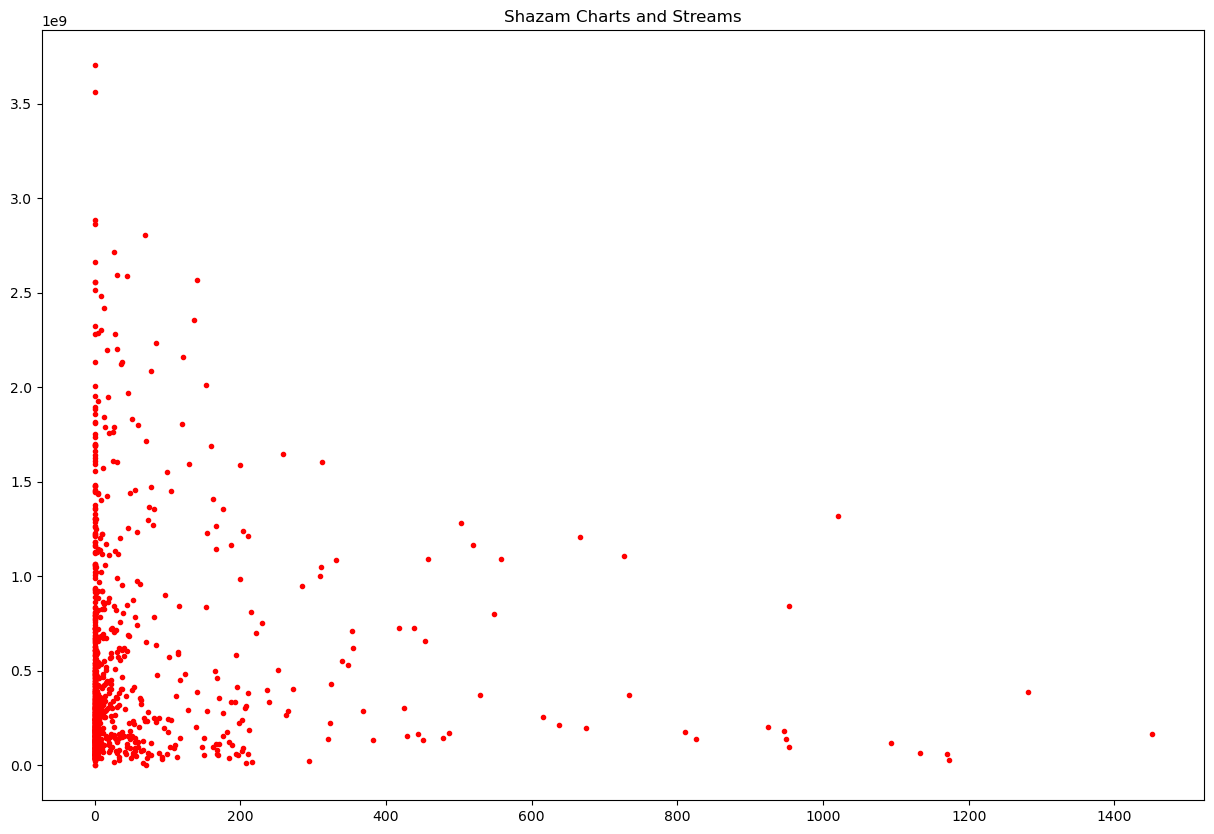

In [54]:
# Visual representation of which platforms show the same insight as the total streams
plt.figure(figsize=(15, 10))
plt.plot(plat['in_shazam_charts'], plat['streams'],'r.')
plt.title('Shazam Charts and Streams')

# -----------------------------------------------------------------------------
#  Advanced Analysis

### Keys and Modes

In [57]:
# Copy the needed attributes for the required advance analysis
adv = df[['track_name', 'streams','key','mode']].copy()
adv

,track_name,streams,key,mode
0,Seven (feat. Latto) (Explicit Ver.),141381703,B,Major
1,LALA,133716286,C#,Major
2,vampire,140003974,F,Major
3,Cruel Summer,800840817,A,Major
4,WHERE SHE GOES,303236322,A,Minor
...,...,...,...,...
948,My Mind & Me,91473363,A,Major
949,Bigger Than The Whole Sky,121871870,F#,Major
950,A Veces (feat. Feid),73513683,C#,Major
951,En La De Ella,133895612,C#,Major


In [58]:
# The same methods used before, use groupby and .size to count how many songs have certain keys
key = pd.DataFrame(adv.groupby('key').size()).reset_index()
key.columns = ['key', 'count']
key = key.sort_values(by='count',ascending=False,ignore_index=True)
key

,key,count
0,C#,120
1,G,96
2,unknown,95
3,G#,91
4,F,89
5,B,81
6,D,81
7,A,75
8,F#,73
9,E,62


Text(0.5, 1.0, 'Visual representation of Key and Streams Patterns')

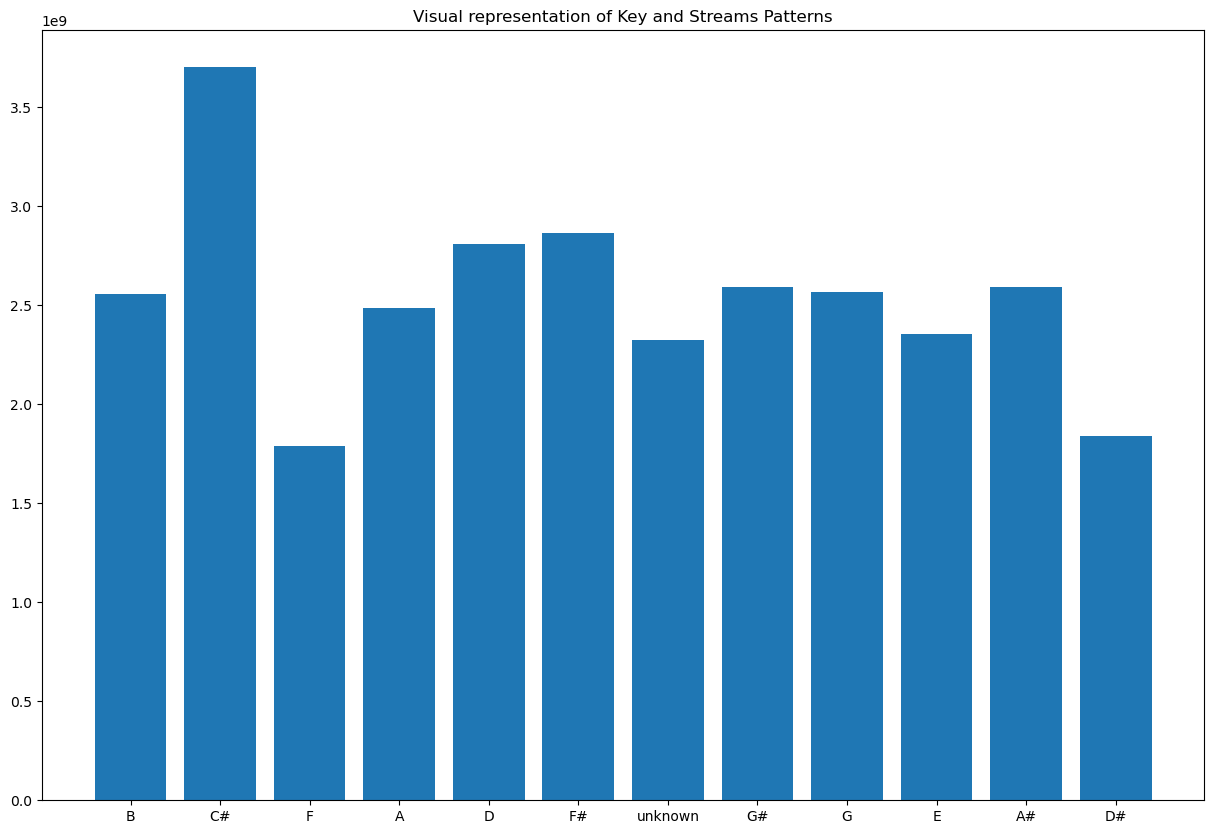

In [59]:
# Visual representation of how many collective streams songs with certain keys have
plt.figure(figsize=(15, 10))
plt.bar(adv['key'], attribute['streams'])
plt.title('Visual representation of Key and Streams Patterns')

In [60]:
# The same methods used before, use groupby and .size to count how many songs have certain keys
mod = pd.DataFrame(adv.groupby('mode').size()).reset_index()
mod.columns = ['mode', 'count']
mod = mod.sort_values(by='count',ascending=False,ignore_index=True)
mod

,mode,count
0,Major,550
1,Minor,403


Text(0.5, 1.0, 'Visual representation of Mode and Streams Pattern')

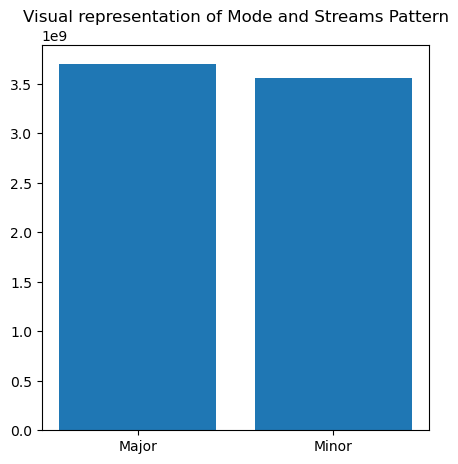

In [61]:
# Visual representation of how many collective streams songs with certain modes have
plt.figure(figsize=(5, 5))
plt.bar(adv['mode'], attribute['streams'])
plt.title('Visual representation of Mode and Streams Pattern')

### Artist and Platforms

In [63]:
# Copy and merge the total streams each artist have and sort them
artplat = df[['artist(s)_name','streams','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts']].copy()
artsort = artplat.groupby('artist(s)_name', as_index=False)[['streams','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts']].sum()
artsort = artsort.sort_values(by='streams',ascending=False,ignore_index=True)
artsort.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854
1,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
2,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874
3,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
4,Bad Bunny,9997799607,51317,268,589,852,751,56,603
5,Olivia Rodrigo,7442148916,47197,130,710,429,1452,15,1047
6,Eminem,6183805596,87331,152,475,281,15121,12,272
7,Bruno Mars,5846920599,32257,35,87,0,4970,0,0
8,Arctic Monkeys,5569806731,84016,190,241,340,4992,6,101
9,Imagine Dragons,5272484650,49878,80,413,311,6721,31,197


In [64]:
# Sorted by Spotify Playlist Entries
artsptpl = artsort.sort_values(by='in_spotify_playlists',ascending=False,ignore_index=True)
artsptpl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854
1,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
2,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874
3,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
4,Eminem,6183805596,87331,152,475,281,15121,12,272
5,Arctic Monkeys,5569806731,84016,190,241,340,4992,6,101
6,Coldplay,3825176058,75716,72,381,25,12727,10,0
7,Avicii,3426754746,68241,42,407,282,7566,1,101
8,Dr. Dre Snoop Dogg,2053908531,65728,0,283,118,12042,2,953
9,Adele,4508746590,65049,69,646,331,9299,29,606


In [114]:
# Sorted by Spotify Charts Entries
artsptpl = artsort.sort_values(by='in_spotify_charts',ascending=False,ignore_index=True)
artsptpl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
1,Bad Bunny,9997799607,51317,268,589,852,751,56,603
2,Arctic Monkeys,5569806731,84016,190,241,340,4992,6,101
3,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
4,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854
5,NewJeans,1544567007,5127,168,133,877,72,13,283
6,Feid,2220740399,14276,165,212,303,214,17,20
7,Eminem,6183805596,87331,152,475,281,15121,12,272
8,Karol G,1260876433,9265,149,177,316,239,33,412
9,Latto Jung Kook,141381703,553,147,43,263,45,10,826


In [66]:
# Sorted by Apple Playlist Entries
artsappl = artsort.sort_values(by='in_apple_playlists',ascending=False,ignore_index=True)
artsappl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
1,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
2,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854
3,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874
4,Dua Lipa,3227639000,39940,101,765,159,2209,42,9
5,Lewis Capaldi,4734698360,28683,81,738,350,2509,9,227
6,Olivia Rodrigo,7442148916,47197,130,710,429,1452,15,1047
7,SZA,4557811204,44539,110,680,1070,567,27,446
8,Adele,4508746590,65049,69,646,331,9299,29,606
9,Justin Bieber,3919813522,38173,29,591,236,2835,0,36


In [116]:
# Sorted by Apple Charts Entries
artsappl = artsort.sort_values(by='in_apple_charts',ascending=False,ignore_index=True)
artsappl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
1,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854
2,SZA,4557811204,44539,110,680,1070,567,27,446
3,NewJeans,1544567007,5127,168,133,877,72,13,283
4,Bad Bunny,9997799607,51317,268,589,852,751,56,603
5,BTS,4389891591,17953,60,558,838,966,4,88
6,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
7,Morgan Wallen,1666199217,8947,46,181,532,30,1,590
8,Billie Eilish,2616432448,18521,106,344,494,731,24,1198
9,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874


In [68]:
# Sorted by Deezer Playlist Entries
artdzpl = artsort.sort_values(by='in_deezer_playlists',ascending=False,ignore_index=True)
artdzpl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874
1,Eminem,6183805596,87331,152,475,281,15121,12,272
2,Linkin Park,2985590613,45176,11,102,0,14149,2,0
3,Nirvana,2058839789,59505,9,310,148,13564,4,203
4,Coldplay,3825176058,75716,72,381,25,12727,10,0
5,Dr. Dre Snoop Dogg,2053908531,65728,0,283,118,12042,2,953
6,Adele,4508746590,65049,69,646,331,9299,29,606
7,Pharrell Williams Nile Rodgers Daft Punk,933815613,52898,0,203,1,8215,0,0
8,Avicii,3426754746,68241,42,407,282,7566,1,101
9,The Weeknd,14185552870,144053,180,1677,1348,7551,23,854


In [118]:
# Sorted by Deezer Charts Entries
artdzpl = artsort.sort_values(by='in_deezer_charts',ascending=False,ignore_index=True)
artdzpl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Harry Styles,11608645649,110026,185,1741,545,3695,76,282
1,Miley Cyrus,1887370770,15583,134,365,263,883,59,1123
2,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
3,Bad Bunny,9997799607,51317,268,589,852,751,56,603
4,OneRepublic,3097149603,37646,119,420,224,3852,48,485
5,Bebe Rexha David Guetta,1109433169,12482,80,291,184,537,45,727
6,Ed Sheeran,13908947204,128758,94,1448,488,16952,43,874
7,Dua Lipa,3227639000,39940,101,765,159,2209,42,9
8,Beyoncï¿,1122304190,20254,10,476,196,625,40,25
9,Rï¿½ï¿½ma Selena G,899183384,7112,77,202,119,318,38,96


In [120]:
# Sorted by Shazam Chart Entries
artdzpl = artsort.sort_values(by='in_shazam_charts',ascending=False,ignore_index=True)
artdzpl.head(10)

,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Taylor Swift,14053658300,132974,542,1796,1866,3086,58,1811
1,Jain,165484133,6060,53,150,148,2703,22,1451
2,David Kushner,511978174,4316,98,93,156,214,25,1281
3,Billie Eilish,2616432448,18521,106,344,494,731,24,1198
4,Ayparia unxbected,58054811,641,50,1,52,8,0,1170
5,Nicki Minaj Aqua Ice Spice,65156199,1117,80,82,145,65,16,1133
6,Miley Cyrus,1887370770,15583,134,365,263,883,59,1123
7,The Weeknd Madonna Playboi Carti,115364561,1945,87,74,182,87,14,1093
8,Olivia Rodrigo,7442148916,47197,130,710,429,1452,15,1047
9,Dr. Dre Snoop Dogg,2053908531,65728,0,283,118,12042,2,953
